In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# 读取数据
file_path = 'Inhibitor1368_mose_data/gjf/transvae/raw_SMILES/caluresults.txt'
# 读取数据
data = []
with open(file_path, 'r') as file:
    # 读取表头
    header = file.readline().strip().split('\t')
    for line in file:
        filename, id, homo_energy, lumo_energy, gap = line.strip().split('\t')
        data.append((filename, id, float(homo_energy), float(lumo_energy), float(gap)))

# 计算硬度和软度，并更新数据
for i, (filename, id, homo_energy, lumo_energy, gap) in enumerate(data):
    hardness = gap / 2
    softness = 1 / gap
    data[i] = (filename, id, homo_energy, lumo_energy, gap, hardness, softness)

# 将更新后的数据写回原文件
with open(file_path, 'w') as file:
    # 写入表头
    file.write('\t'.join(header + ['Hardness', 'Softness']) + '\n')
    for row in data:
        file.write('\t'.join(map(str, row)) + '\n')



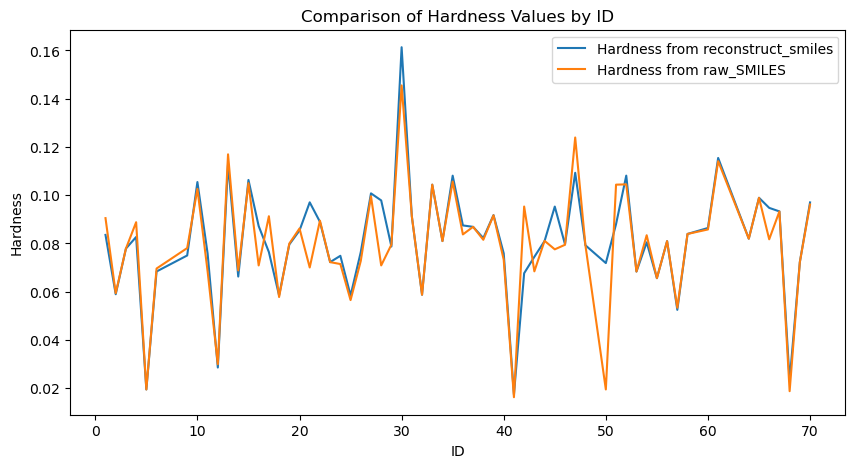

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
# 读取数据
data1 = pd.read_csv('Inhibitor1368_mose_data/gjf/rnnattn/reconstruct_smiles/caluresults.txt',sep='\t', usecols=['id', 'Hardness'])
data2 = pd.read_csv('Inhibitor1368_mose_data/gjf/rnnattn/raw_SMILES/caluresults.txt',sep='\t', usecols=['id', 'Hardness'])

# 根据ID合并两个数据集
merged_data = pd.merge(data1, data2, on='id', suffixes=('_1', '_2'))

# 排序（如果需要的话）
merged_data.sort_values('id', inplace=True)

# 绘制曲线图
plt.figure(figsize=(10, 5))
plt.plot(merged_data['id'], merged_data['Hardness_1'], label='Hardness from reconstruct_smiles')
plt.plot(merged_data['id'], merged_data['Hardness_2'], label='Hardness from raw_SMILES')
plt.title('Comparison of Hardness Values by ID')
plt.xlabel('ID')
plt.ylabel('Hardness')
plt.legend()
plt.grid(False)
# 保存为PDF文件
plt.savefig('figures/rnnattn_Hardness.pdf', format='pdf', bbox_inches='tight')
plt.show()



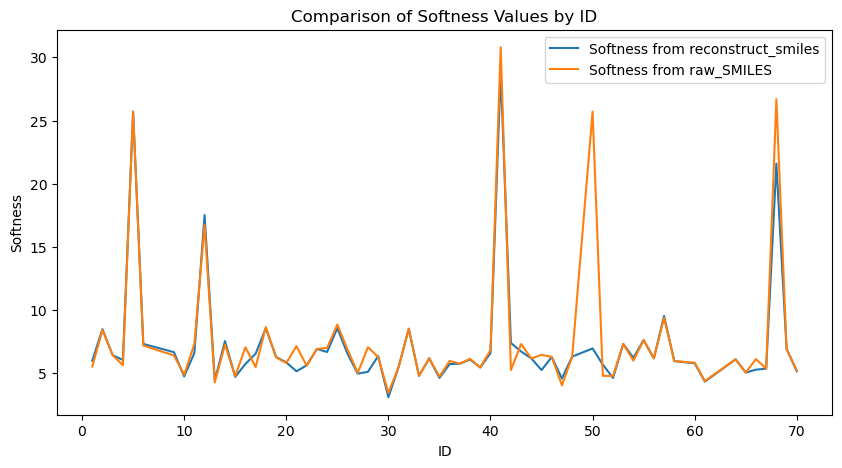

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
# 读取数据
data1 = pd.read_csv('Inhibitor1368_mose_data/gjf/rnnattn/reconstruct_smiles/caluresults.txt',sep='\t', usecols=['id', 'Softness'])
data2 = pd.read_csv('Inhibitor1368_mose_data/gjf/rnnattn/raw_SMILES/caluresults.txt',sep='\t', usecols=['id', 'Softness'])

# 根据ID合并两个数据集
merged_data = pd.merge(data1, data2, on='id', suffixes=('_1', '_2'))

# 排序（如果需要的话）
merged_data.sort_values('id', inplace=True)

# 绘制曲线图
plt.figure(figsize=(10, 5))
plt.plot(merged_data['id'], merged_data['Softness_1'], label='Softness from reconstruct_smiles')
plt.plot(merged_data['id'], merged_data['Softness_2'], label='Softness from raw_SMILES')
plt.title('Comparison of Softness Values by ID')
plt.xlabel('ID')
plt.ylabel('Softness')
plt.legend()
plt.grid(False)
# 保存为PDF文件
plt.savefig('figures/rnnattn_Softness.pdf', format='pdf', bbox_inches='tight')
plt.show()



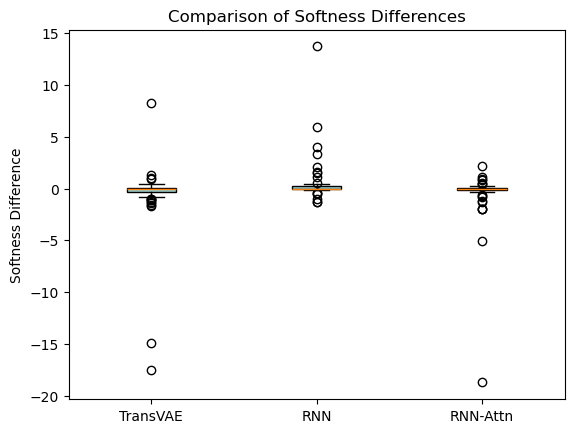

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['ps.fonttype']=42
# 读取数据
def read_and_process(file1, file2):
    df1 = pd.read_csv(file1, sep='\t',usecols=['id', 'Softness'])
    df2 = pd.read_csv(file2,sep='\t', usecols=['id', 'Softness'])
    
    # 以id为键合并两个DataFrame
    merged = pd.merge(df1, df2, on='id', suffixes=('_1', '_2'))
    
    # 计算gap差值
    merged['Softness_diff'] = merged['Softness_1'] - merged['Softness_2']
    
    return merged['Softness_diff']

# 处理每一对文件
transvae_diff = read_and_process('Inhibitor1368_mose_data/gjf/transvae/reconstruct_smiles/caluresults.txt', 'Inhibitor1368_mose_data/gjf/transvae/raw_SMILES/caluresults.txt')
rnn_diff = read_and_process('Inhibitor1368_mose_data/gjf/rnn/reconstruct_smiles/caluresults.txt', 'Inhibitor1368_mose_data/gjf/rnn/raw_SMILES/caluresults.txt')
rnnattn_diff = read_and_process('Inhibitor1368_mose_data/gjf/rnnattn/reconstruct_smiles/caluresults.txt', 'Inhibitor1368_mose_data/gjf/rnnattn/raw_SMILES/caluresults.txt')

# 数据可视化
data = [transvae_diff, rnn_diff, rnnattn_diff]
labels = ['TransVAE', 'RNN', 'RNN-Attn']
"""
# 自定义颜色
colors = ['#2878b5', '#9ac9db', '#f8ac8c']  # 更科学的颜色：蓝色、橙色、绿色
boxprops = dict(linestyle='-', linewidth=1.5, color='black')
medianprops = dict(linestyle='-', linewidth=1.5, color='firebrick')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='black')
capprops = dict(linestyle='-', linewidth=1.5, color='black')
flierprops = dict(marker='o', markerfacecolor='grey', markersize=8, linestyle='none')

# 数据可视化
plt.boxplot(data, labels=labels, patch_artist=True, 
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            flierprops=flierprops)

# 设置颜色
for patch, color in zip(plt.boxplot(data, patch_artist=True)['boxes'], colors):
    patch.set_facecolor(color)
"""
# 创建箱型图

box = plt.boxplot(data, labels=labels, patch_artist=True)

# 设置箱体颜色
for patch in box['boxes']:
    patch.set_facecolor('#96CCCB')  # 天蓝色
plt.ylabel('Softness Difference')
plt.title('Comparison of Softness Differences')
plt.grid(False)
plt.savefig('figures/Softness-comparison.pdf', format='pdf', bbox_inches='tight')
plt.show()
